# **Trustworthy Machine Learning**
### Winter Semester 2022-2023
### Lecturer: Seong Joon Oh
### **Exercise 0 -- Preliminary Materials**

---

Student name <input> Joschka Strüber

Student email <input> joschka.strueber@student.uni-tuebingen.de

---

#### **Submission deadline: 27/10/2022 at 23:59.**

Welcome to the Trustworthy Machine Learning course! TML is an advanced course that assumes some basic knowledge of machine learning and deep learning. This zeroth exercise will test your prerequisite knowledge and skills. 

#### **Policy for the zeroth exercise**
This exercise is the **only individual exercise** in our course. The rest of the exercises in our course will be submitted and graded per group. The purpose of this zeroth exercise is to ensure that individual members of each group are sufficiently committed. As such, **we will enrol only the students who submit the zeroth exercise**. We will only accept solutions with the **minimal passing grade 30/100 points** to make sure that students do not submit empty work. The grade for the zeroth exercise **does not count towards the final grade**. The main purpose of this exercise is to selectively enrol motivated students and for you to evaluate your own readiness for the course. 


####**Submission**
Follow the below four steps.

(1) Copy this colab file to your local gdrive;

`File > Save a copy in Drive`

(2) Work on the solution on your local copy;

(3) Pin the version for submission in history;

`Click on "All changes saved" or "Last saved at XX:XX AM/PM" next to the drop-down menus at the top > Select version to submit > Click on three vertical dots (vertical ellipsis) > Rename > Write "Submission" `

(4) Share your local colab with `stai.there@gmail.com` before the deadline.

`Click on "Share" at the top-right corner > Put stai.there@gmail.com in "Add people and groups" > Give the "Viewer" right and tick on "Notify people" > Click send.`

Note that we are able to see the edit history with time stamps, so please ensure that you stop working on your notebook before the deadline.

## **0.1 Multivariate Calculus (10 + 10 + 5 = 25 points)**

Let $f\in\mathbb{R}^C$ be a vector with dimension $C$, equal to the number of classes. Let $Y\in\{1,\cdots,C\}$ be the corresponding ground-truth label. We define the softmax-cross-entropy loss as follows:
\begin{equation}
    \mathcal{L} = -\sum_{j=1}^C \delta_{jY} \log \frac{\exp{f_j}}{\sum_k \exp{f_k}}
\end{equation}
where $\delta_{ab}$ is the Kronecker Delta:
\begin{equation}
    \delta_{ab} = 
    \begin{cases}
        1\quad \text{if $a=b$;} \\
        0\quad \text{otherwise;}
    \end{cases}
\end{equation}

(a) Compute the gradient $\frac{\partial \mathcal{L}}{\partial f_c}$ for $c\in\{1,\cdots,C\}$. It may be helpful to introduce the substitution $p_j:=\frac{\exp{f_j}}{\sum_k \exp{f_k}}$. **(10 points)**

**Solution:**

We start by expanding the logarithm on $p_j$ and taking the partial derivative on both parts of the sum:

\begin{align}
  \frac{\partial \mathcal{L}}{\partial f_c} &= - \sum_{j=1}^C \delta_{jY} \frac{\partial}{\partial f_c} \log \left( \frac{\exp f_j}{\sum_k \exp f_k} \right) \\
  &= - \sum_{j=1}^C \delta_{jY} \frac{\partial}{\partial f_c} \left( f_j - \log \sum_k \exp f_k \right) \\
  &= - \sum_{j=1}^C \delta_{jY} \left( \frac{\partial f_j}{\partial f_c} - \frac{\partial}{\partial f_c} \log \sum_k \exp f_k \right) \\
  &= - \sum_{j=1}^C \delta_{jY} \left( \delta_{jc} - \frac{\exp f_c}{\sum_k \exp f_k} \right), \\
\end{align}

where the last step followed by using the chain rule as well as the derivatives of the logarithmic and exponential function. Next, we use the property of products of Kronecker deltas and the definition of $p_c$:

\begin{align}
  \frac{\partial \mathcal{L}}{\partial f_c} &= - \sum_{j=1}^C \delta_{jY} \left( \delta_{jc} - \frac{\exp f_c}{\sum_k \exp f_k} \right), \\
  &= - \sum_{j=1}^C \delta_{Yc} - \delta_{jY} p_c \\
  &= \left( \sum_{j=1}^C \delta_{jY} \right) p_c - \delta_{Yc} \\
  &= p_c - \delta_{Yc}
\end{align}

Here we used the fact that $p_c$ and $\delta_{Yc}$ are independent of the control variable $j$ and that the sum of Kronecker deltas must be one, because $Y$ is one-hot encoded.

Let $\{(X_i, Y_i)\}_{i=1}^N$ be data samples with $X\in\mathbb{R}^D$ (e.g. images) and $Y\in\{1,\cdots,C\}$ (e.g. labels). Let  $f:\mathbb{R}^I\rightarrow\mathbb{R}^C$ be a two-layer neural network of the following architecture
\begin{equation}
    f(X;W,V) = V\cdot \sigma(W\cdot X)
\end{equation}
where $W\in\mathbb{R}^{H\times D}$ maps $X$ to a hidden space $\mathbb{R}^H$, $\sigma$ is the element-wise ReLU activation function $\sigma(x)=\max\{0,x\}$, and $V\in\mathbb{R}^{C\times H}$ maps a hidden representation to the output space $\mathbb{R}^C$. Now, plug in our two-layer neural network to the $f$ in the softmax-cross-entropy loss:
\begin{equation}
    \mathcal{L}(W,V) = -\sum_{j=1}^C \delta_{jY} \log \frac{\exp{f_j(X;W,V)}}{\sum_k \exp{f_k(X;W,V)}}
\end{equation}

(b) Compute the gradient $\frac{\partial \mathcal{L}}{\partial V_{ch}}$ for $c\in\{1,\cdots,C\}$ and $h\in\{1,\cdots,H\}$ using the answer to (a) and chain rule. **(10 points)**

**SOLUTION:**

Using the chain rule and the partial derivative wrt. $p_c$ yields: 
\begin{align}
  \frac{\partial \mathcal{L}}{\partial V_{ch}} &= \frac{\partial \mathcal{L}}{\partial f_c} \frac{\partial f_c}{\partial V_{ch}} \\
  &= \left( p_c - \delta_{Yc} \right) \frac{\partial f_c}{\partial V_{ch}} \\
\end{align}

It is enough to concentrate on $f_c$, because since we are looking at $V_{ch}$, we only care about the $c$-th row of the output vector, as the partial derivative wrt. $V_{ch}$ of all other ones is 0. We continue by plugging in the definition of entry $f_c$:

\begin{align}
  \frac{\partial \mathcal{L}}{\partial V_{ch}} &= \left( p_c - \delta_{Yc} \right) \frac{\partial f_c}{\partial V_{ch}} \\
  &= \left( p_c - \delta_{Yc} \right) \frac{\partial}{\partial V_{ch}} \sum_{i=1}^H V_{ci} \sigma(W\cdot X)_i \\
  &= \left( p_c - \delta_{Yc} \right) \sigma(W\cdot X)_h \\
\end{align}


(c) Compute the gradient $\frac{\partial \mathcal{L}}{\partial W_{hd}}$ for $h\in\{1,\cdots,H\}$ and $d\in\{1,\cdots,D\}$ using the answer to (b) and chain rule. **(5 points)**

**SOLUTION:**

$W_{hd}$ is a fan-out that influences each entry of $f_c$. Therefore, we have to sum up the gradients and plug in the solution to (b).

\begin{align}
  \frac{\partial \mathcal{L}}{\partial W_{hd}} &= \sum_{j=1}^C \frac{\partial \mathcal{L}}{\partial V_{jh}} \frac{\partial V_{jh}}{\partial W_{hd}} \\
  &= \sum_{j=1}^C \left( p_j - \delta_{Yj} \right) \sigma(W\cdot X)_h \frac{\partial V_{jh}}{\partial W_{hd}} \\
  &= \sum_{j=1}^C \left( p_j - \delta_{Yj} \right) \sigma(W\cdot X)_h \mathbb{1}_{\sigma(W\cdot X)_h > 0} X_d \\
\end{align}

We used chain rule and the fact that the derivative of ReLU is either 0 or 1 and write it as indicator function.

**Comment:** I'm fairly confident this solution is wrong, because for the gradient of entries of $W$, we don't need the gradient wrt. the parameters of the previous layer, $V$, but that of the compute nodes that used $V$ instead.

## **0.2 Generalisation (5 + 5 + 5 + 5 + 5 = 25 points)**


(a) What is the role of training, validation, and test splits of a dataset for machine learning? **(5 points)**

**Solution:**

The training set is used to train a given model with a fixed set of hyperparameters. The validation set's purpose is to evaluate such a model trained on the training set to find the best model, set of hyperparameters or point in time to stop the training via early stopping. Once a model with hyperparameters is chosen based on the performance on the test set, it can be finally evaluated on the test set. The score on the set can be used as a benchmark against other approaches.

In theory, the test set must only be used to report final results and not for model selection. In practice, subsequent research is always based on models that performed well on the test sets of standards benchmarks, resulting in at least a small information leak.

**WRITE YOUR SOLUTION HERE**

Consider an image classification task, where $X\in\mathbb{R}^D$ is an input image and $Y\in\{1,\cdots,C\}$ is the corresponding label following $p(X,Y)$. Let $\mathcal{D}^\text{tr}=\{(X_i,Y_i)\}_{i=1}^N$ and $\mathcal{D}^\text{te}=\{(X_i,Y_i)\}_{i=N+1}^{N+M}$ be training and test samples, respectively, that are IID-sampled from $p(X,Y)$. Let $f_\theta$ be a model trained on $\mathcal{D}^\text{tr}$. Write $f_\theta(c,X)\in[0,1]$ for the predicted probability that image $X$ belongs to class $c$.

(b) Write down the equations for the training- and test-set accuracies of $p_\theta$. **(5 points)**


**Solution:**

\begin{align}
  \operatorname{acc}_{\operatorname{tr}} &= \frac{1}{N} \sum_{i=1}^N \mathbb{1}_{\{\operatorname{argmax}_j(f_{\theta}(j, X_i)) == Y_i\}} \\
  \operatorname{acc}_{\operatorname{te}} &= \frac{1}{M} \sum_{i=N+1}^{N+M} \mathbb{1}_{\{\operatorname{argmax}_j(f_{\theta}(j, X_i)) == Y_i\}}
\end{align}

In other words, we count the empirical mean of correct predictions as estimators for inverse of the true risk based on the 0-1-loss.

(c) Explain what it means to say that $f_\theta$ "generalises well" and introduce a quantitative metric for this. **(5 points)**

**Solution:**

A model $f_{\theta}$ generalizes well, if its performance on new, previously unseen data drawn from the same data distribution is just or at least almost as good as the set used for training the model.

A quantitative metric for this could be the difference in performance between the training and a test or validation set:

\begin{equation}
  \operatorname{train\_test\_diff} = \operatorname{acc}_{\operatorname{tr}} - \operatorname{acc}_{\operatorname{te}}
\end{equation}

Whether to use the unchanged, absolute or squared difference is up to debate and depends what you want to measure.

(d) Explain the concept of overfitting and underfitting. **(5 points)**


**Solution:**

Overfitting happens if the model complexity is too high without counteracting regularization. The result is a model that often performs perfect or almost perfect on the training data, but fails to generalize to unseen data. This often happens when we have a high estimation error, because the model that has only seen a small subset of all possible data, learns random noise.

Underfitting means that the model's complexity is not high enough and its proposed solution too simple to explain the true data distribution (eg. class boundaries). This usually happens when the chosen model class is not large and complex enough and has a high approximation error compared to the Bayes classifier.

(e) Explain the respective solutions for overfitting and underfitting. **(5 points)**


**Solution:**

The solution to overfitting is to either reduce the model complexity (eg. smaller network with less parameters and layers), use stronger regularization to prevent overcomplex solution, incorporate augmentation techniques to increase the amount of data the models sees, or use methods such as early stopping that stop the training process, when it performs best on the unseen validation set.

Underfitting can be countered by using models with higher complexity. Possible approaches are using a higher (initial) learning rate, weaker regularization or a model with more layers and parameters.

## **0.3 MNIST Case-study (15 + 15 + 10 + 10 = 50 points)**

*This exercise is based on the public code at https://colab.research.google.com/github/skorch-dev/skorch/blob/master/notebooks/MNIST.ipynb (BSD 3-Clause License)*.

In [ ]:
! [ ! -z "$COLAB_GPU" ] && pip install torch scikit-learn==0.20.* skorch

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import logging

### Loading Data

The following code downloads MNIST. It takes 2-3 minutes.

In [ ]:
mnist = fetch_openml('mnist_784', cache=True)

In [ ]:
mnist.data.shape

(70000, 784)

### Preprocessing Data

Each image of the MNIST dataset is encoded in a 784 dimensional vector, representing a 28 x 28 pixel image. Each pixel has a value between 0 and 255, corresponding to the grey-value of a pixel.<br />
The above ```featch_mldata``` method to load MNIST returns ```data``` and ```target``` as ```uint8``` which we convert to ```float32``` and ```int64``` respectively.

In [ ]:
##### COMMENT: had to change to numpy array, because new fetch_openml returns 
##### pandas dataframe. Result were OOM errors in the train-test-split test
X = mnist.data.astype('float32').to_numpy()
y = mnist.target.astype('int64').to_numpy()

To avoid big weights that deal with the pixel values from between [0, 255], we scale `X` down. A commonly used range is [0, 1].

In [ ]:
X /= 255.0

In [ ]:
X.min(), X.max()

(0.0, 1.0)

### Preparing Train-Val-Test Splits (15 points)

Let's split the given MNIST data (70000 samples) into 3 partitions: train, val, and test. Complete the function `train_test_split` **(15 points)**.

In [ ]:
def train_test_split(X, y, val_size, test_size, random_seed=None):
  """
  Given a labelled dataset in memory, return two disjoint partitions, train and test, randomly split according to the given test_size.
  For replicability, make sure that the same random_seed returns the same split of the dataset.
  Args:
    X: numpy.ndarray of shape (N, D) and type np.float32. N is the number of sample instances and D is the dimensionality of input features.
    y: numpy.ndarray of shape (N,) and type np.int64.
    val_size: float value between 0 and 1. Controls the ratio of val samples.
    test_size: float value between 0 and 1. Controls the ratio of test samples.
    random_seed: int or None. If it is int, set the random seed to ensure replicability. If it is None, do not set the random seed.
  Returns:
    dict of
      X_train: numpy.ndarray of shape (N - L - M, D) and type np.float32.
      y_train: numpy.ndarray of shape (N - L - M,) and type np.int64.
      X_val: numpy.ndarray of shape (L, D) and type np.float32. L = int(N * val_size).
      y_val: numpy.ndarray of shape (L,) and type np.int64.
      X_test: numpy.ndarray of shape (M, D) and type np.float32. M = int(N * test_size).
      y_test: numpy.ndarray of shape (M,) and type np.int64.
  """
  #### >>>> PUT YOUR SOLUTION HERE <<<< 15 points
  # shuffle data and targets in unison
  rng = np.random.default_rng(seed=random_seed)
  N, D = X.shape

  # I think this works as intended, but runs out of memory on colab:
  """
  cat = np.c_[X,y]
  np.random.shuffle(cat)

  X_sh, y_sh = cat[:,:X.shape[1]], cat[:,-1]
  print(cat.shape, X_sh.shape, y_sh.shape)
  """

  # different approach that resets RNG state and uses in-place shuffling
  idx = np.arange(N)
  rng.shuffle(idx)

  # get the indices separating train, val and test sets
  L = int(N * val_size)
  M = int(N * test_size)

  # split the data into the three different sets
  X_train = X[idx[:N-L-M]]
  y_train = y[idx[:N-L-M]]

  X_val = X[idx[N-L-M:N-M]]
  y_val = y[idx[N-L-M:N-M]]

  X_test = X[idx[N-M:]]
  y_test = y[idx[N-M:]]

  #### >>>> ENT OF YOUR SOLUTION <<<<
  return {
      "X_train": X_train,
      "y_train": y_train,
      "X_val": X_val,
      "y_val": y_val,
      "X_test": X_test,
      "y_test": y_test,
  }

Define test functions.

In [ ]:
def compute_diff_matrix(mat1, mat2, max_samples):
  """
  Compute the pairwise L1 distance among the feature vectors in mat1 and mat2.
  Args:
    mat1: array of shape (N, D) where D is the feature dimension.
    mat2: array of shape (M, D)
    max_samples: for the interest of RAM usage, we may restrict the max number of samples
  Returns:
    dist_mat: array of shape (N, M) where N <- min(max_samples, N) and M <- min(max_samples, M)
  """
  num_samples1 = min(max_samples, len(mat1))
  num_samples2 = min(max_samples, len(mat2))
  diff_matrix = np.abs(
      np.expand_dims(mat1[:num_samples1], axis=0) # (1, N, D)
    - np.expand_dims(mat2[:num_samples2], axis=1) # (M, 1, D)
  ).sum(axis=2)
  return diff_matrix


def train_test_split_test(X, y):
  print(f"Checking train-val-test split sizes.")
  data_splits = train_test_split(X, y, val_size=0.2, test_size=0.5, random_seed=None)
  assert(len(data_splits["X_train"]) == 21000)
  assert(len(data_splits["X_val"]) == 14000)
  assert(len(data_splits["X_test"]) == 35000)
  assert(len(data_splits["y_train"]) == 21000)
  assert(len(data_splits["y_val"]) == 14000)
  assert(len(data_splits["y_test"]) == 35000)
  data_splits = train_test_split(X, y, val_size=0.1, test_size=0.8, random_seed=None)
  assert(len(data_splits["X_train"]) == 7000)
  assert(len(data_splits["X_val"]) == 7000)
  assert(len(data_splits["X_test"]) == 56000)
  assert(len(data_splits["y_train"]) == 7000)
  assert(len(data_splits["y_val"]) == 7000)
  assert(len(data_splits["y_test"]) == 56000)

  print(f"Checking train-test split purity.")
  diff_matrix_tr_te = compute_diff_matrix(mat1=data_splits["X_train"],
                                          mat2=data_splits["X_test"],
                                          max_samples=1000)
  assert(diff_matrix_tr_te.min() > 0)
  diff_matrix_tr_val = compute_diff_matrix(mat1=data_splits["X_train"],
                                           mat2=data_splits["X_val"],
                                           max_samples=1000)
  assert(diff_matrix_tr_val.min() > 0)
  diff_matrix_te_val = compute_diff_matrix(mat1=data_splits["X_test"],
                                           mat2=data_splits["X_val"],
                                           max_samples=1000)
  assert(diff_matrix_te_val.min() > 0)

  print(f"Checking whether random seed is working.")
  data_splits1 = train_test_split(X, y, val_size=0.1, test_size=0.3, random_seed=65)
  data_splits2 = train_test_split(X, y, val_size=0.1, test_size=0.3, random_seed=65)
  data_splits3 = train_test_split(X, y, val_size=0.1, test_size=0.3, random_seed=66)
  data_splits4 = train_test_split(X, y, val_size=0.1, test_size=0.3, random_seed=None)
  data_splits5 = train_test_split(X, y, val_size=0.1, test_size=0.3, random_seed=None)
  
  assert((data_splits1["X_train"]==data_splits2["X_train"]).all())
  assert((data_splits2["X_train"]!=data_splits3["X_train"]).any())
  assert((data_splits4["X_train"]!=data_splits5["X_train"]).any())

Test your solution by running the test function below.

In [ ]:
train_test_split_test(X, y)

Checking train-val-test split sizes.
Checking train-test split purity.
Checking whether random seed is working.


In [ ]:
data_splits = train_test_split(X, y, val_size=0.1, test_size=0.1, random_seed=42)

In [ ]:
for key in data_splits:
  print(f"{key} shape: {data_splits[key].shape}")

X_train shape: (56000, 784)
y_train shape: (56000,)
X_val shape: (7000, 784)
y_val shape: (7000,)
X_test shape: (7000, 784)
y_test shape: (7000,)


In [ ]:
def plot_example(X, y, num_samples=10):
    """Plot the first N images and their labels in a row."""
    for i, (img, y) in enumerate(zip(X[:num_samples].reshape(num_samples, 28, 28), y[:num_samples])):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)

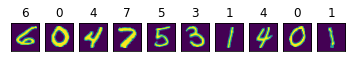

In [ ]:
plot_example(data_splits["X_train"], data_splits["y_train"])

### Define an MLP Model
Simple, fully connected neural network with one hidden layer. Input layer has 784 dimensions (28x28), hidden layer has 98 (= 784 / 8) and output layer 10 neurons, representing digits 0 - 9.

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
device

'cuda'

In [ ]:
class MLP(nn.Module):
    def __init__(
            self,
            input_dim,
            hidden_dim,
            output_dim,
            dropout=0.5,
    ):
        super(MLP, self).__init__()
        print(f"input_dim={input_dim}, hidden_dim={hidden_dim}, output_dim={output_dim}")

        self.dropout = nn.Dropout(dropout)

        self.hidden = nn.Linear(input_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)

    def forward(self, X, **kwargs):
        X = F.relu(self.hidden(X))
        X = self.dropout(X)
        # This softmax probably shouldn't be here, since we are supposed to 
        # implement SoftmaxCrossEntropyLoss, right?
        X = F.softmax(self.output(X), dim=-1)
        return X

### Define the Loss Function (15 points)

We train the model with the softmax-cross-entropy loss. The first part of the function is already there.
```
outputs = outputs - outputs.max(1, keepdim=True)[0]
```
This part ensures the numerical stability of the softmax operation, which is translation invariant.
```
labels_onehot = F.one_hot(labels, num_classes=10)
```
This part turns the integer labels into one-hot vectors.

Complete the loss function **(15 points)**.

In [ ]:
class SoftmaxCrossEntropyLoss(nn.Module):
  def forward(self, outputs, labels):
    """
    Compute softmax cross-entropy loss.
    Args:
      outputs: Torch.Tensor of shape (B, C) and type float32.
      labels: Torch.Tensor of shape (B,) and type long.
    Returns:
      loss: Torch.Tensor of scalar shape and type float32.
    """
    outputs = outputs - outputs.max(1, keepdim=True)[0]
    labels_onehot = F.one_hot(labels, num_classes=10) # shape (B, C) type bool

    #### >>>> PUT YOUR SOLUTION HERE <<<< 15 points
    preds = torch.exp(outputs)
    preds = preds / torch.sum(preds, dim=0)
    loss_elem = - labels_onehot * torch.log(preds)
    loss = loss_elem.mean()
    #### >>>> ENT OF YOUR SOLUTION <<<<
    return loss

### Define Solver

A programming framework that is often used to manage model training, inference, and evaluation is the Solver object. This is advantageous because such activities around a model share common data and methods: 
- Model (torch.nn.Module)
- Dataset (torch.utils.data.Dataset)

We have defined the Solver class for you. You may find this framework useful for managing ML code later on.

In [ ]:
class Solver(object):
  def __init__(self, data_splits, model, criterion, config):
    self.config = config
    self.model = model
    self.criterion = criterion
    self.optimizer = optim.SGD(self.model.parameters(),
                               lr=config["lr"],
                               momentum=config["momentum"])
    self.data_splits = data_splits

  def load_dataloader(self, split, role):
    if role == "eval":
      batch_size = config["eval_batch_size"]
      shuffle = True
    elif role == "train":
      batch_size = config["batch_size"]
      shuffle = False
    else:
      raise ValueError(f"Unknown role name {role}.")
    
    return torch.utils.data.DataLoader(
      torch.utils.data.TensorDataset(
          torch.from_numpy(self.data_splits[f"X_{split}"]),
          torch.from_numpy(self.data_splits[f"y_{split}"])
      ), 
      batch_size=batch_size,
      shuffle=shuffle,
      num_workers=config["num_workers"])

  def fit_one_batch(self, inputs, labels):
    self.optimizer.zero_grad()
    outputs = self.model(inputs)
    loss = self.criterion(outputs, labels)
    loss.backward()
    self.optimizer.step()
    return loss

  def fit_one_epoch(self, epoch_idx):
    loss_epoch = 0.0
    dataloader = self.load_dataloader(split="train", role="train")
    for batch_idx, (inputs, labels) in enumerate(dataloader):
      loss = self.fit_one_batch(inputs, labels)
      loss_epoch += loss.item()
    loss_epoch /= batch_idx + 1
    print(f"train_loss {loss_epoch: 2.3f}", end="\t")

  def fit(self, evaluate_on):
    for epoch_idx in range(self.config["num_epochs"]):
      print(f"epoch {epoch_idx + 1:03d}", end="\t")
      self.fit_one_epoch(epoch_idx)
      accuracy = self.evaluate(evaluate_on)
      print(f"val_accuracy: {accuracy: 2.3f}%", end="\t")
      print()

  def evaluate(self, evaluate_on):
    correct = 0
    total = 0
    dataloader = self.load_dataloader(split=evaluate_on, role="eval")
    with torch.no_grad():
      for (inputs, labels) in dataloader:
        outputs = self.model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    return 100 * correct / total

### Train Model

Initialise your solver with some initial config values and train the model

In [ ]:
config = {
  # Critical configs that affect the trained model
  "batch_size": 512,
  "lr": 0.001,
  "momentum": 0.9,
  "num_epochs": 50,
  # Configs that do not influence the trained model
  "num_workers": 0,
  "eval_batch_size": 128,
}

input_dim = data_splits["X_train"].shape[1]

solver = Solver(
    data_splits=data_splits,
    model=MLP(
      input_dim=input_dim,
      hidden_dim=int(input_dim/8),
      output_dim=10,
    ),
    criterion=SoftmaxCrossEntropyLoss(),
    config=config,
)

solver.fit(evaluate_on="val")
accuracy = solver.evaluate(evaluate_on="val")
print(f"Final accuracy: {accuracy:.3f}%")

input_dim=784, hidden_dim=98, output_dim=10
epoch 001	train_loss  0.623	val_accuracy:  10.229%	
epoch 002	train_loss  0.623	val_accuracy:  10.500%	
epoch 003	train_loss  0.623	val_accuracy:  10.486%	
epoch 004	train_loss  0.623	val_accuracy:  10.986%	
epoch 005	train_loss  0.623	val_accuracy:  10.871%	
epoch 006	train_loss  0.623	val_accuracy:  12.100%	
epoch 007	train_loss  0.623	val_accuracy:  12.400%	
epoch 008	train_loss  0.623	val_accuracy:  12.471%	
epoch 009	train_loss  0.623	val_accuracy:  12.543%	
epoch 010	train_loss  0.623	val_accuracy:  12.814%	
epoch 011	train_loss  0.623	val_accuracy:  13.543%	
epoch 012	train_loss  0.623	val_accuracy:  13.457%	
epoch 013	train_loss  0.623	val_accuracy:  14.157%	
epoch 014	train_loss  0.623	val_accuracy:  14.214%	
epoch 015	train_loss  0.623	val_accuracy:  14.729%	
epoch 016	train_loss  0.623	val_accuracy:  14.914%	
epoch 017	train_loss  0.623	val_accuracy:  15.071%	
epoch 018	train_loss  0.623	val_accuracy:  14.857%	
epoch 019	train_loss

### Hyperparameter Tuning (10 points)

Now, find a config set (`batch_size`, `lr`, `momentum`) that returns a **validation-set accuracy >= 95%** at any epoch <=50 **(10 points)**.

**You may not change the training data.**

In [ ]:
#### >>>> PUT YOUR SOLUTION HERE <<<< 10 points
config = {
  # Critical configs that affect the trained model
  "batch_size": 32,
  "lr": 0.05,
  "momentum": 0.95,
  "num_epochs": 50,
  # Configs that do not influence the trained model
  "num_workers": 0,
  "eval_batch_size": 128,
}
#### >>>> ENT OF YOUR SOLUTION <<<<

input_dim = data_splits["X_train"].shape[1]

solver = Solver(
    data_splits=data_splits,
    model=MLP(
      input_dim=input_dim,
      hidden_dim=int(input_dim/8),
      output_dim=10,
    ),
    criterion=SoftmaxCrossEntropyLoss(),
    config=config
)

solver.fit(evaluate_on="val")
accuracy = solver.evaluate(evaluate_on="val")
print(f"Final accuracy: {accuracy:.3f}%")

input_dim=784, hidden_dim=98, output_dim=10
epoch 001	train_loss  0.308	val_accuracy:  79.071%	
epoch 002	train_loss  0.284	val_accuracy:  87.743%	
epoch 003	train_loss  0.279	val_accuracy:  90.029%	
epoch 004	train_loss  0.277	val_accuracy:  90.414%	
epoch 005	train_loss  0.276	val_accuracy:  91.271%	
epoch 006	train_loss  0.276	val_accuracy:  91.671%	
epoch 007	train_loss  0.275	val_accuracy:  92.271%	
epoch 008	train_loss  0.275	val_accuracy:  92.757%	
epoch 009	train_loss  0.274	val_accuracy:  92.614%	
epoch 010	train_loss  0.274	val_accuracy:  92.814%	
epoch 011	train_loss  0.274	val_accuracy:  93.100%	
epoch 012	train_loss  0.274	val_accuracy:  93.314%	
epoch 013	train_loss  0.273	val_accuracy:  93.186%	
epoch 014	train_loss  0.273	val_accuracy:  93.243%	
epoch 015	train_loss  0.273	val_accuracy:  92.971%	
epoch 016	train_loss  0.273	val_accuracy:  93.886%	
epoch 017	train_loss  0.273	val_accuracy:  93.629%	
epoch 018	train_loss  0.273	val_accuracy:  93.814%	
epoch 019	train_loss

### Define a CNN Model
We may take advantage of the image structure to enjoy more efficient usage of model parameters. CNNs assume that parameters can be devoted to model the composition of nearby pixels in an image, rather than any long-range dependence. We define a CNN model for you. This is a LeNet structure.

In [ ]:
class CNN(nn.Module):
    def __init__(self, dropout=0.5):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.conv2_drop = nn.Dropout2d(p=dropout)
        self.fc1 = nn.Linear(1600, 100) # 1600 = number channels * width * height
        self.fc2 = nn.Linear(100, 10)
        self.fc1_drop = nn.Dropout(p=dropout)

    def forward(self, x):
        x = x.reshape(-1, 1, 28, 28)
        x = torch.relu(F.max_pool2d(self.conv1(x), 2))
        x = torch.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        
        # flatten over channel, height and width = 1600
        x = x.view(-1, x.size(1) * x.size(2) * x.size(3))
        
        x = torch.relu(self.fc1_drop(self.fc1(x)))
        x = torch.softmax(self.fc2(x), dim=-1)
        return x

### Train a CNN Model

In [ ]:
config = {
  # Critical configs that affect the trained model
  "batch_size": 128,
  "lr": 0.1,
  "momentum": 0.9,
  "num_epochs": 10,
  # Configs that do not influence the trained model
  "num_workers": 0,
  "eval_batch_size": 128,
}

input_dim = data_splits["X_train"].shape[1]

solver = Solver(
    data_splits=data_splits,
    model=CNN(),
    criterion=SoftmaxCrossEntropyLoss(),
    config=config
)

solver.fit(evaluate_on="val")
accuracy = solver.evaluate(evaluate_on="val")
print(f"Final accuracy: {accuracy:.3f}%")

epoch 001	train_loss  0.477	val_accuracy:  58.500%	
epoch 002	train_loss  0.435	val_accuracy:  73.971%	
epoch 003	train_loss  0.425	val_accuracy:  79.786%	
epoch 004	train_loss  0.421	val_accuracy:  81.871%	
epoch 005	train_loss  0.420	val_accuracy:  82.700%	
epoch 006	train_loss  0.419	val_accuracy:  83.429%	
epoch 007	train_loss  0.418	val_accuracy:  84.286%	
epoch 008	train_loss  0.417	val_accuracy:  84.886%	
epoch 009	train_loss  0.417	val_accuracy:  85.100%	
epoch 010	train_loss  0.417	val_accuracy:  84.943%	
Final accuracy: 85.300%


### Report (10 points)

We want to answer the research question: Is MLP or CNN more advantageous for MNIST digit classification task?

Make an argument below, based on empirical evidence, which architecture is "better"?

For answering this question, consider the following aspects:
- Accuracy, indeed, but also
- Computational complexity
  - Space and time
  - Training and inference
- Fairness of hyperparameter tuning and model choice
- Error bar of accuracy

Feel free to run additional model training experiments to support your argument. **(10 points)**

**SOLUTION:**

Just based on the accuracies on the validation sets, the MLP appears to perform much better on MNIST than the CNN. However, this comparison is not really fair, because we spent a lot of time and computational capacities to find a set of hyperparameters (and even worse, a run that got above 95% accuracy on the validation set) for the MLP without spending the same amount of resources on the CNN. Unfortunately, my runtime expired and I do not want to run the experiments again, because the MLP experiment has a lot of variation and does not always reach the 95% accuracy on MNIST. For this reason, I do not run any additional tests for this task, but draw my conclusions based on the limited amount of information and outline an approach that could be used to find the better model.

For a fair comparison in terms of classification quality, we would have to quantify the resources spent to find the best hyperparameters for both models and make sure they are even. Afterwards, we have to get a final evaluation on the unseen test data to really see how well the models generalize. Since the training of neural networks is stochastic, because we optimize with unbiased estimates of the true gradient, it can also make sense to repeat the training process with a fixed set of parameters several times and report the mean and standard deviation of accuracies on the test set.

We randomly select train, validation and test sets on our own, so far with the train-test-split method. This gives us a lot of flexibility and if we want to find out which model classes between MLPs and CNNs perform better in general, we can perform cross-validation with a fixed test set or maybe even nested cross validation to have several independent test sets. This way we would have a much higher chance of actually finding the better of the two approaches.

So far, we only discussed the quality based on accuracy. However, there are other hard or soft metrics than can be used to define how good a model performs, eg. number of parameters, how robust it is for hyperparameter choices, FLOPs needed for training, time needed for training (does not have to be identical), inference time, and many others.

Usually, CNN variations are known to perform much better on image data than MLPs, if you spend the same amount of computational resources. The reason is that MLPs use dense layers that cause large amounts of parameters and FLOPs, because they grow quadratically with the number of neurons per layer. CNNs, on the other hand, exploit the spatial locality of most images and are efficient thanks to weight-sharing in convolutional kernels. In our case, this appears no to be true and the CNN trains much slower than the MLP. The reasons are that the input data has a very low input resolution of only 28x28=784 pixels and the MLP is defined in such a way that it is much more efficient than the CNN on these input. It uses a fairly small hiden layer with only 98 neurons, while the CNN has 64 filters in the last convolutional layer that is connected to a fully-connected layer without any global pooling. 

Evaluating based on all of the aforementioned KPIs is very difficult. For this reason it usually makes sense to pick one of them, eg. the number of FLOPs needed for training, define several differing MLPs and CNNs based on this metric and then train and evaluate them. In case of MLPs and CNNs we could increase the number of layers and neurons, respectively feature maps, per layer. If enough data is available and the regularization is chosen according to the model capacity, the more complex models should perform better, resulting in an accuracy curve for both of the model classes. In a best case scenario even with error bars for both of them. This allows us to pick the pareto-optimal model for a chosen computational budget. 

I also generated an "ENT OF YOUR SOLUTION" for this submission, because I think that typo was very funny:

![ENT](https://drive.google.com/uc?export=view&id=1RuuCLvKkWXJT2HSEThUzVSw1JG7oZLni) 